# Pareto front plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

## Read trials results 
These are stored in `vanilla.csv`

In [2]:
#results_dir = 'results_week3_SH_515/' # set results directory
results_dir = 'results_week3_SH_530/'

df = pd.read_csv("../"+results_dir+"vanilla.csv")

In [3]:
df

,number,values_0,values_1,values_2,datetime_start,datetime_complete,duration,params_learning_rate,params_model_name,params_norm,params_train_batch_size,params_training_loss,params_weight_decay,state
0,0,1.167031,4.718693,2.505749,2023-05-30 15:46:46.735020,2023-05-30 15:56:19.240160,0 days 00:09:32.505140,0.000013,deeplabv3+,zscore,49,smooth,2.353429e-10,COMPLETE
1,1,13.709431,11.082100,3.911683,2023-05-30 15:46:46.961414,2023-05-30 15:51:19.835865,0 days 00:04:32.874451,0.003749,fpn,negone,67,logcosh,2.077068e-10,COMPLETE
2,2,1.106603,1.782596,1.403194,2023-05-30 15:51:19.941459,2023-05-30 16:28:41.756355,0 days 00:37:21.814896,0.000004,pspnet,negone,76,mse,7.619539e-05,COMPLETE
3,3,1.018861,1.091104,1.014967,2023-05-30 15:56:19.354286,2023-05-30 16:01:29.615837,0 days 00:05:10.261551,0.004813,deeplabv3+,minmax,6,huber,1.769209e-06,COMPLETE
4,4,1.102235,1.805639,1.534363,2023-05-30 16:01:29.740872,2023-05-30 16:11:16.108604,0 days 00:09:46.367732,0.000018,manet,minmax,116,huber,6.387046e-11,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,198,0.974887,0.540189,0.798335,2023-05-31 13:43:05.081113,2023-05-31 13:58:47.324484,0 days 00:15:42.243371,0.000008,unet,minmax,4,smooth,4.375294e-06,COMPLETE
199,199,4.706292,7.465791,3.296495,2023-05-31 13:45:33.762608,2023-05-31 13:48:34.801611,0 days 00:03:01.039003,0.000001,unet,zscore,98,mse,1.774771e-09,COMPLETE
200,200,1.000123,1.115467,1.091284,2023-05-31 13:48:34.971882,2023-05-31 13:54:25.193964,0 days 00:05:50.222082,0.000045,unet,negone,4,logcosh,1.653245e-05,COMPLETE
201,201,0.966805,0.451589,0.741334,2023-05-31 13:54:25.311045,2023-05-31 13:58:28.216712,0 days 00:04:02.905667,0.000484,unet,minmax,11,logcosh,9.911067e-05,COMPLETE


## Plot individual metric values

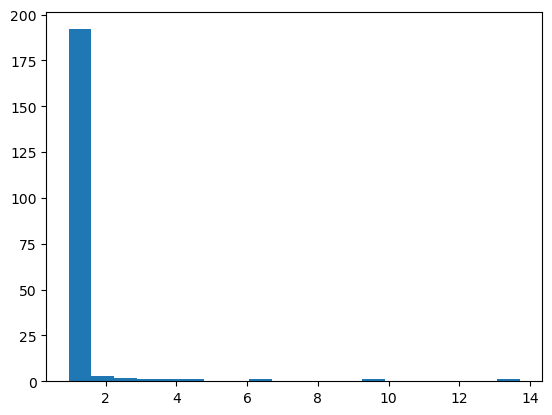

In [5]:
plt.hist(df.values_0, bins=20);

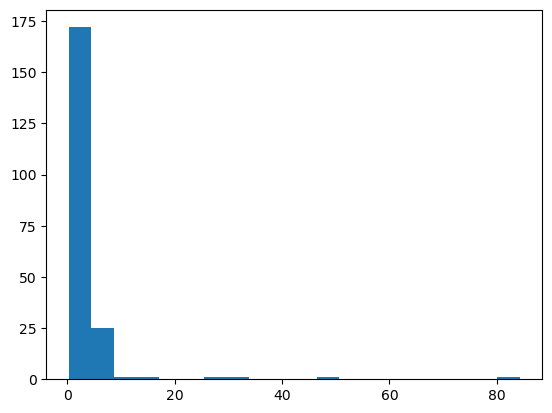

In [6]:
plt.hist(df.values_1, bins=20);

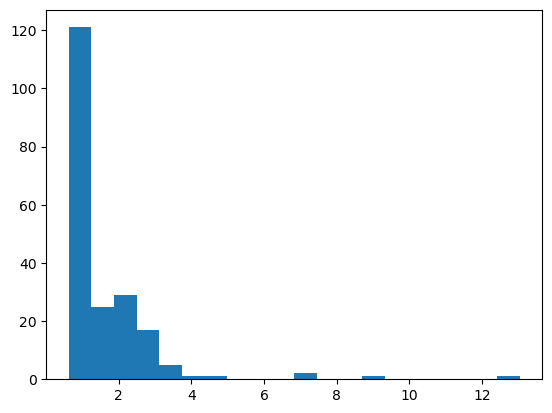

In [7]:
plt.hist(df.values_2, bins=20);

## Plot 2 metrics

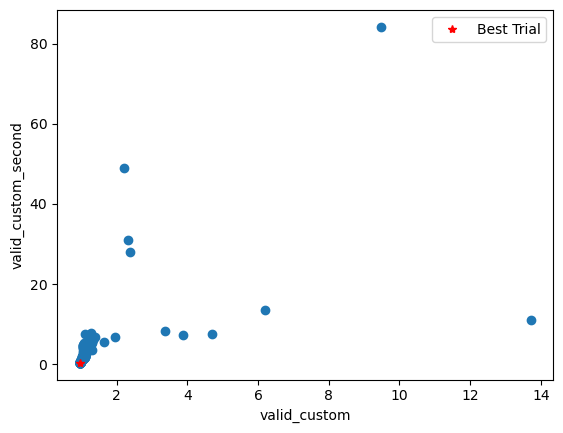

In [15]:
plt.scatter(df.values_0, df.values_1)

plt.plot(min(df.values_0), min(df.values_1), 'r*', label='Best Trial')

# add bounds
#maxval=5
#plt.xlim(0,maxval)
#plt.ylim(0,maxval)

plt.xlabel('valid_custom')
plt.ylabel('valid_custom_second')

plt.legend();

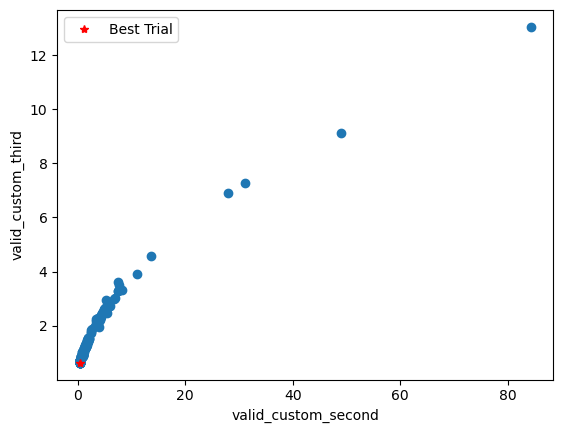

In [16]:
plt.scatter(df.values_1, df.values_2)

plt.plot(min(df.values_1), min(df.values_2), 'r*', label='Best Trial')

#maxval=5
#plt.xlim(0,maxval)
#plt.ylim(0,maxval)

plt.xlabel('valid_custom_second')
plt.ylabel('valid_custom_third')

plt.legend();

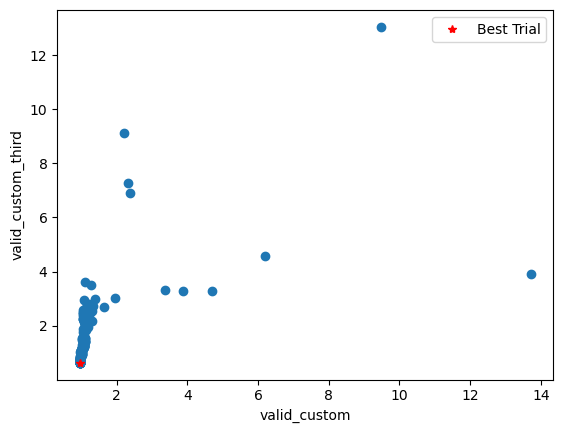

In [17]:
plt.scatter(df.values_0, df.values_2)

plt.plot(min(df.values_0), min(df.values_2), 'r*', label='Best Trial')

#maxval=2
#plt.xlim(0,maxval)
#plt.ylim(0,maxval)

plt.xlabel('valid_custom')
plt.ylabel('valid_custom_third')

plt.legend();

## 3D scatter with matplotlib

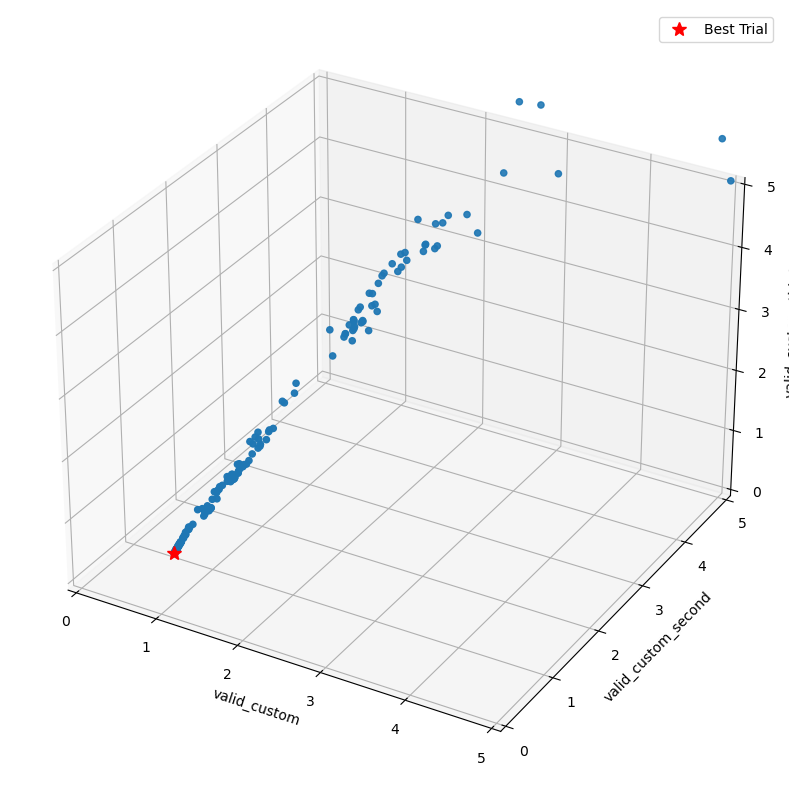

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

# set bounds
maxval=5
ax.set_xlim3d(None,maxval)
ax.set_ylim3d(None,maxval)
ax.set_zlim3d(None,maxval)

# axis labels
ax.set_xlabel('valid_custom')
ax.set_ylabel('valid_custom_second')
ax.set_zlabel('valid_custom_third')

ax.scatter(df.values_0, df.values_1, df.values_2)

ax.plot(min(df.values_0), min(df.values_1), min(df.values_2), 'r*', markersize=10, label='Best Trial', zorder=10);

plt.legend();

#plt.savefig('../'+results_dir+'pareto_front_zoom.png', bbox_inches='tight', pad_inches=0.5);

## 3D scatter with plotly

In [22]:
# check min indices
print(df.values_0.idxmin(), df.values_1.idxmin(), df.values_2.idxmin())

132 132 132


In [23]:
# check values
print(df.loc[df.values_0.idxmin()].values_0, df.loc[df.values_1.idxmin()].values_1, df.loc[df.values_2.idxmin()].values_2)

0.9570060382889714 0.3404996390473804 0.627988662014309


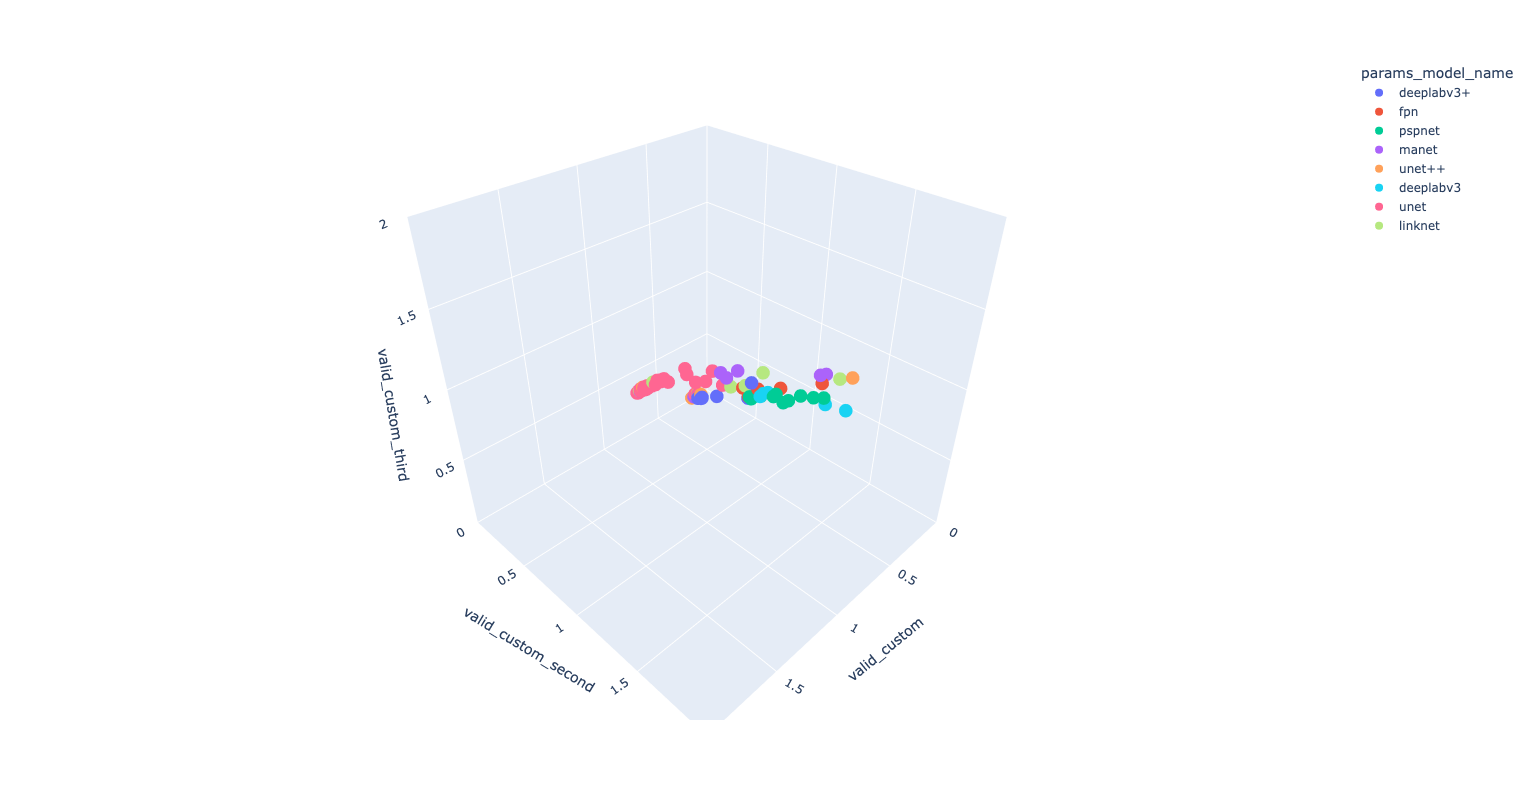

In [27]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_model_name',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)

# add best trial - still in progress trying to figure out how to add or highlight a single point
#idx=129
#fig = px.scatter_3d(df.loc[129], x=df.loc[idx].values_0, y=df.loc[idx].values_1, z=df.loc[idx].values_2,
#                    color='black')


fig.show()

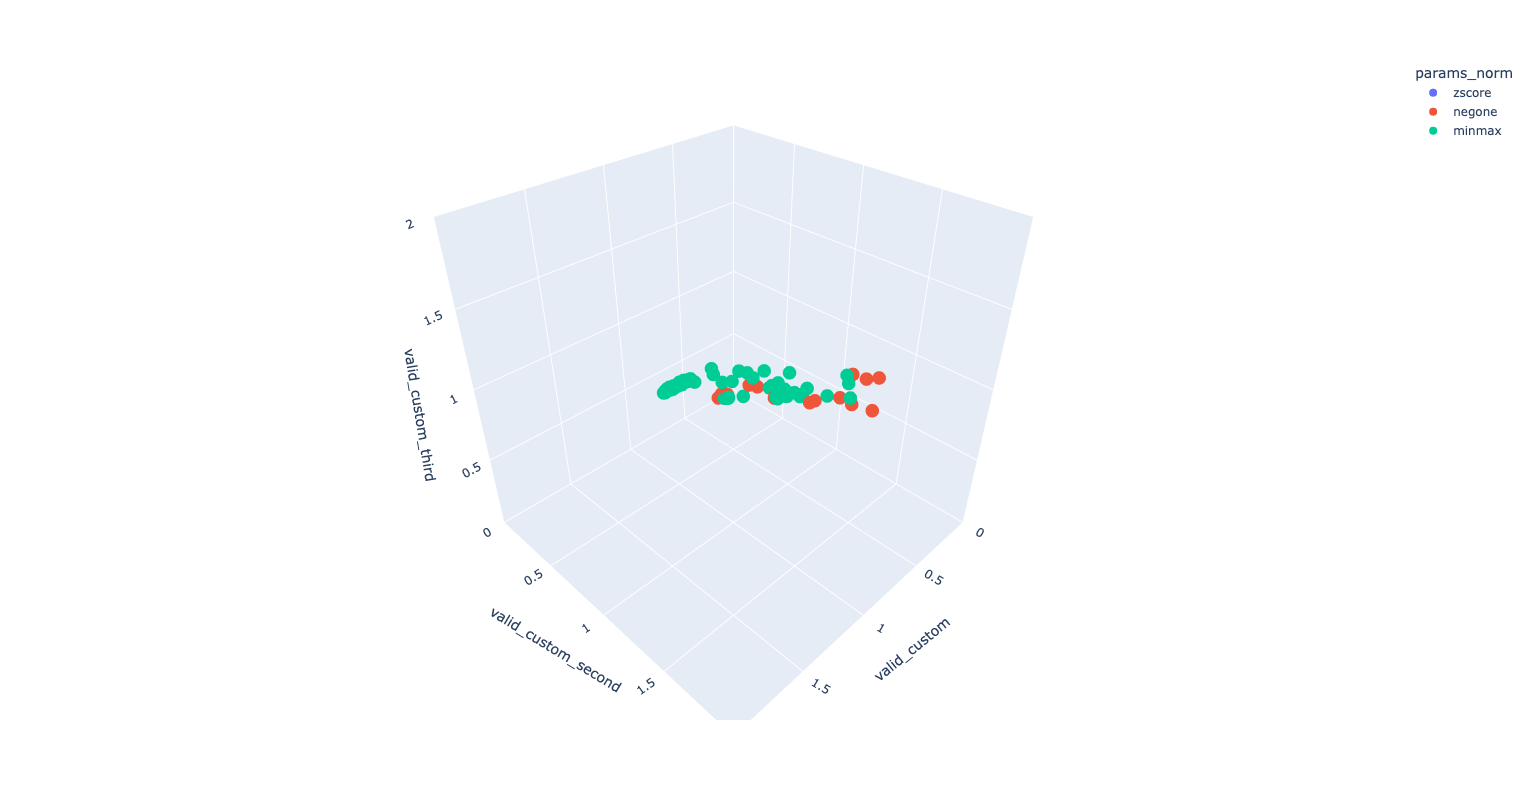

In [28]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_norm',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

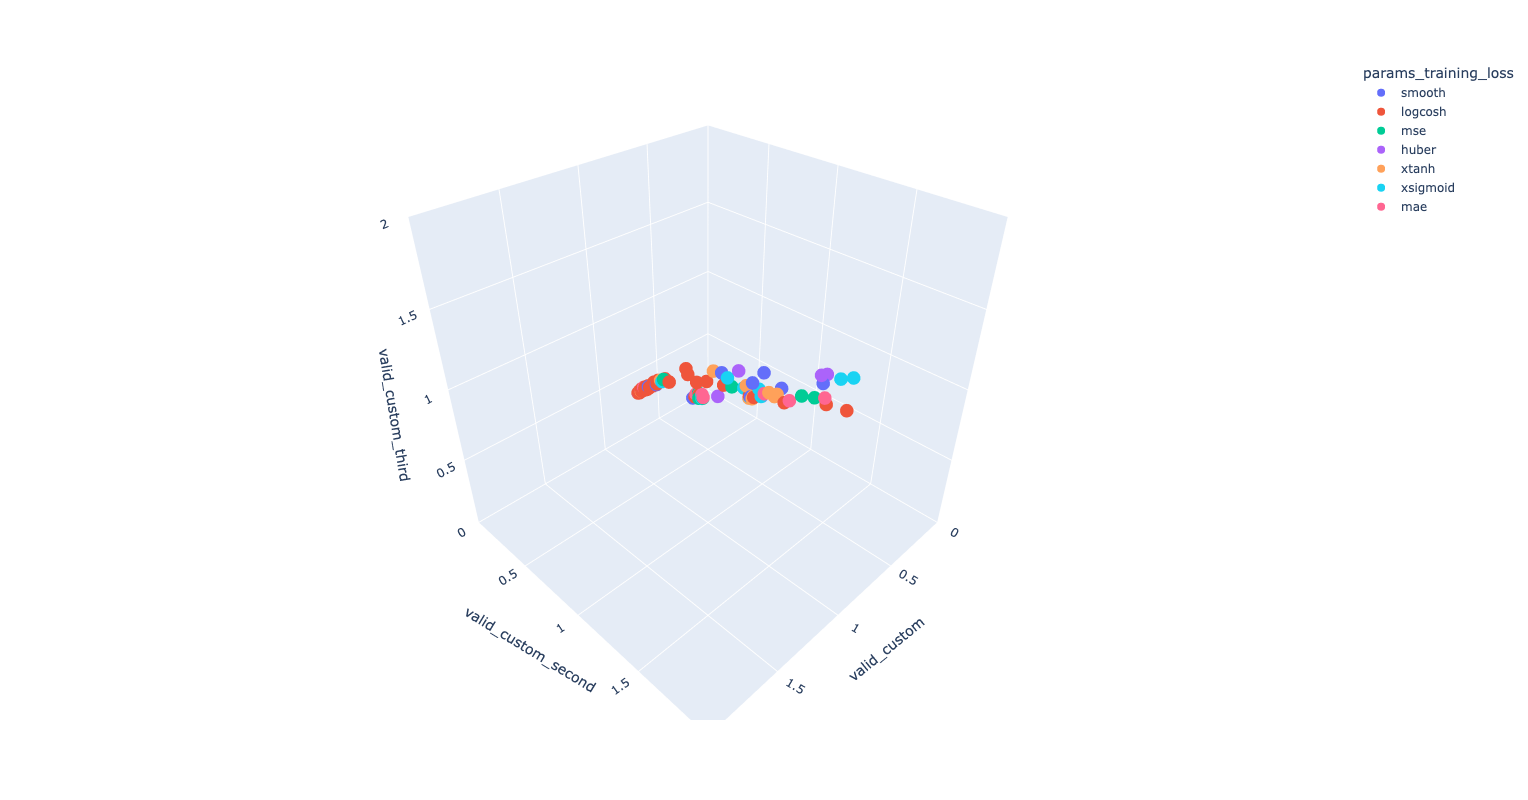

In [34]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_training_loss',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

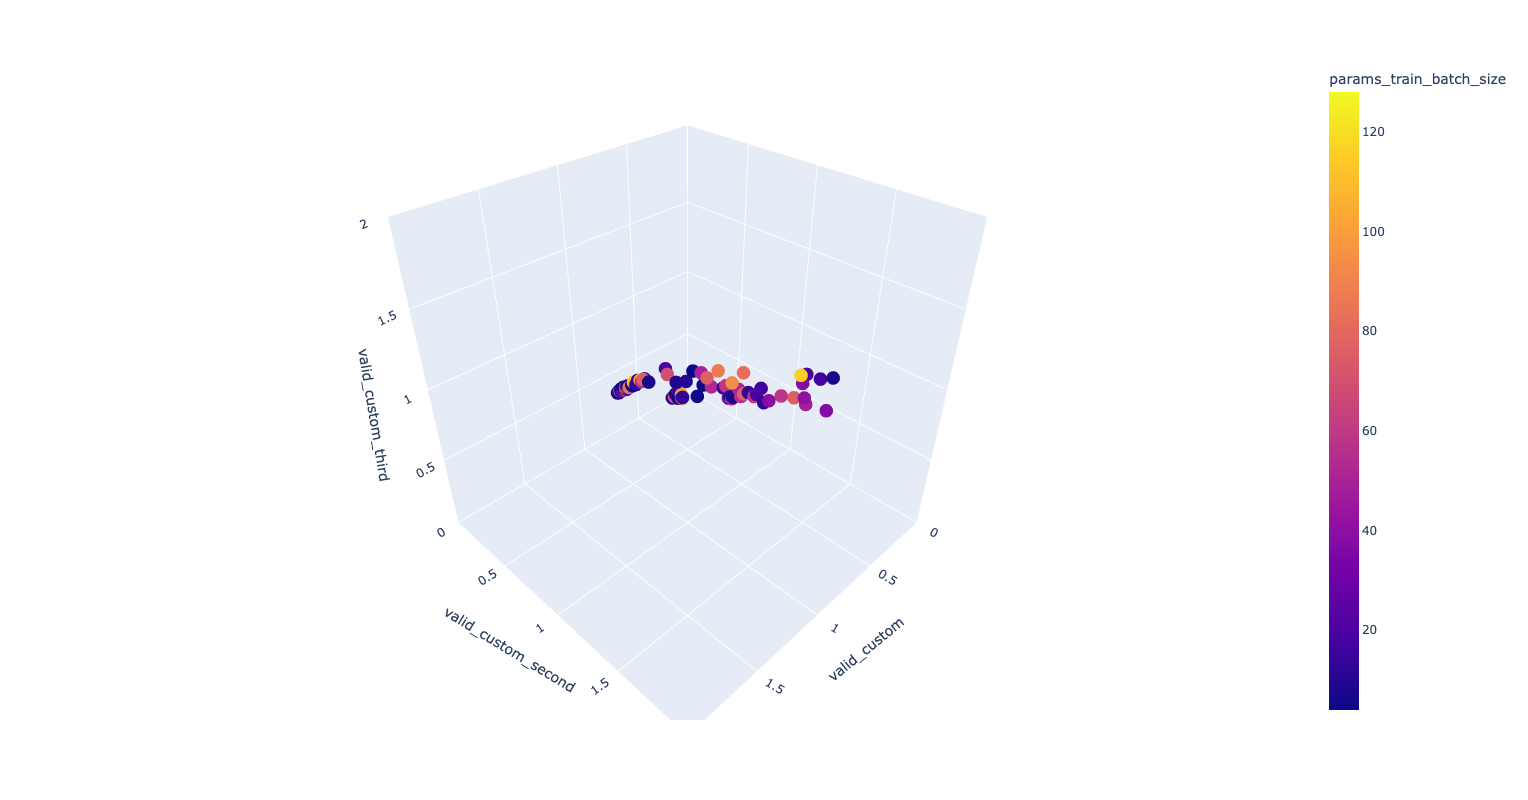

In [35]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_train_batch_size',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

In [42]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_learning_rate',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

# this needs an additional package
#fig.write_image('../'+results_dir+'pareto_front_lr.png')

In [43]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_weight_decay',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

## TO DO: look into [PyVista](https://docs.pyvista.org/version/stable/)